In [13]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web
import matplotlib.dates as mdates
import numpy as np
from scipy.stats import norm
import statsmodels.formula.api as smf

In [4]:
start = dt.datetime(2000,1,1) 
end = dt.datetime(2016,12,31) 

In [5]:
df = web.DataReader('AMZN','yahoo',start,end)

In [6]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,766.500000,757.989990,764.549988,760.590027,1981600,760.590027
2016-12-27,774.650024,761.200012,763.400024,771.400024,2638700,771.400024
2016-12-28,780.000000,770.500000,776.250000,772.130005,3301000,772.130005
2016-12-29,773.400024,760.849976,772.400024,765.150024,3158300,765.150024
2016-12-30,767.400024,748.280029,766.469971,749.869995,4139400,749.869995


In [8]:
style.use('ggplot')

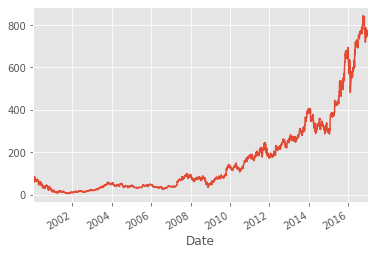

In [10]:
df.Close.plot()
plt.show()

In [12]:
df['MA10'] = df['Close'].rolling(10).mean()
df['MA50'] = df['Close'].rolling(50).mean()
df = df.dropna()

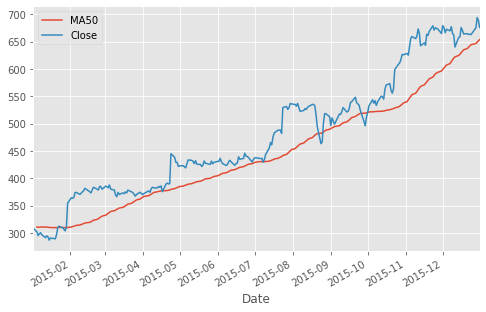

In [22]:
#Plot the moving average
plt.figure(figsize=(8, 5))
df['MA50'].loc['2015-01-05':'2015-12-31'].plot(label='MA50')
df['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close')
plt.legend()
plt.show()

### VaR

In [14]:
df['logReturn'] = np.log(df['Close'].shift(-1)) - np.log(df['Close'])

In [16]:
mu = df['logReturn'].mean()
sigma = df['logReturn'].std(ddof=1)

In [24]:
# Probability that the stock price will drop over 5% in a DAY
prob_return1 = norm.cdf(-0.05, mu, sigma)
print('The Probability that the stock price of amazon will drop over 5% in a day is ', prob_return1)

The Probability that the stock price of amazon will drop over 5% in a day is  0.07130928866349456


In [23]:
# Value at risk(VaR)
VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk ')
print('With 5% chance, the daily return is worse than ',VaR)

Single day value at risk 
With 5% chance, the daily return is worse than  -0.056156529142161474


### Estimation of the average stock return with 90% confidence interval

In [25]:
size = df.shape[0]

mean = df['logReturn'].mean()
std = df['logReturn'].std(ddof=1) / size**0.5

# left and right quantile
z_left = norm.ppf(0.05)
z_right = norm.ppf(0.95)

# upper and lower bound
left = mean + z_left * std 
right = mean + z_right * std

In [28]:
print('The average stock return of Amazon with 90% of confidence is between: ') 
print((left,right))   

The average stock return of Amazon with 90% of confidence is between: 
(-0.00036884359845633407, 0.001363726129161361)
